### The purpose of this tutorial is to walk through the execution of this code, starting with inputs and calculating the displacements and forces on the matrix defined. 

In [47]:
#Import Libraries

import sys
sys.path.append('/Assignment2/src')
import os
import numpy as np
from src import *
from math_utils import *

### Establish nodes (x, y, z)
Establish elements to establish connectivity in the structure ([node1, node2, E, nu, A, Iz, Iy, Ip, J, z_axis])

Establish support conditions, 
    1 = free DOF, 
    0 = constrained  
    (Node index, x, y, z, z, y, p)

Establish applied forces, must establish for each node (Fx, Fy, Fz, Mx, My, Mz)

In [48]:
#Define each node using the following template
#NodeX = [X, Y, Z]
node0 = [0, 0, 0]  
node1 = [30, 40, 0] 

#node2 = [10, 20, 0]  
#node3 = [0, 20, 0]  
#node4 = [0, 0, 25]  
#node5 = [10, 0, 25]  
#node6 = [10, 20, 25]  
#node7 = [0, 20, 25]  

nodes = np.array([node0, node1])

r = 0.5
pi = np.pi
#Define element using the following template
#ElementX = ([nodeX1, nodeX2, E, nu, A, Iz, Iy, Ip, J, z_axis])
element1 = [0, 1, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, [0,0,1]]

#element2 = [4, 5, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
#element3 = [5, 6, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
#element4 = [6, 7, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
#element5 = [7, 4, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
#element6 = [2, 6, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
#element7 = [1, 5, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]
#element8 = [3, 7, 500, 0.5, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, None]

elements = np.array([element1], dtype=object)

# Assign support constraints for each node as delineated below, as either fixed, free, or pinned. 
# 0 = free DOF, 1 = constrained DOF
support_0 = [0, 1, 1, 1, 1, 1, 1]  # [node_id, 1, 1, 1, 1, 1, 1] Fixed Node
support_1 = [1, 0, 0, 0, 0, 0, 0]  # [node_id, 0, 0, 0, 0, 0, 0] Free Node

#support_2 = [2, 1, 1, 1, 1, 1, 1]  # [node_id, 1, 1, 1, 0, 0, 0] Pinned Node
#support_3 = [3, 1, 1, 1, 1, 1, 1]
#support_4 = [4, 0, 0, 0, 0, 0, 0]
#support_5 = [5, 0, 0, 0, 0, 0, 0]
#support_6 = [6, 0, 0, 0, 0, 0, 0]
#support_7 = [7, 0, 0, 0, 0, 0, 0]
supports = np.array([support_0, support_1])

force_applied = np.array([  [  0,   0,    0,   0,   0,   0], 
                            [  -3/5,   -4/5,    0,   0,   0,   0]])

                            #
                            #[  0,   0,    0,   0,   0,   0],
                            #[  0,   0,    0,   0,   0,   0],
                            #[  0,   0,    -1,   0,   0,   0],
                            #[  0,   0,    -1,   0,   0,   0],
                            #[  0,   0,    -1,   0,   0,   0],
                            #[  0,   0,    -1,   0,   0,   0]])



### Compute Displacements and Forces, reformat for easier use

In [49]:
displacement, forces = structure(nodes, elements, force_applied, supports)
size = displacement.shape
n = size[0]/6
n = int(n)
reshape = np.reshape(displacement, (n, 6))
x_disp = reshape[:,0]
y_disp = reshape[:,1]
z_disp = reshape[:,2]
shape_force = forces.shape
n1 = shape_force[0]/6
n1 = int(n1)
reshape_forces = np.reshape(forces, (n,6))




### Results


In [50]:
print ('displacements=', reshape)
print ('forces = ', reshape_forces)

displacements= [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.63943727e-02 -1.01859164e-01 -0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -2.98618745e-15]]
forces =  [[ 6.00000000e-01  8.00000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.93124899e-15]
 [-6.00000000e-01 -8.00000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.33680869e-19]]


### Elastic *Could not get this section to work*

In [51]:
z = element(element1)

critical_loads = elastic_critical_load_analysis(elements, displacement)

TypeError: element.__init__() missing 9 required positional arguments: 'node2', 'E', 'nu', 'A', 'Iz', 'Iy', 'Ip', 'J', and 'z_axis'

[ 0 30]


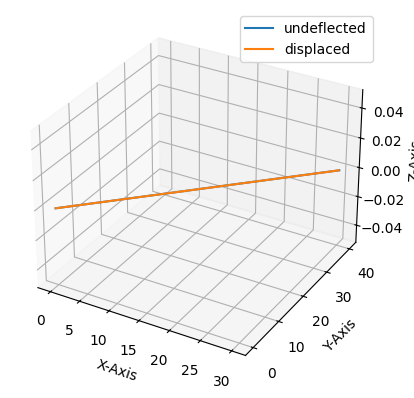

In [52]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
x = nodes [:,0]
x_1 = nodes [:,0] + x_disp
y = nodes [:,1]
y_1 = nodes [:,1] + y_disp
z = nodes [:,2]
z_1 = nodes [:,2] + z_disp
print (x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot (x,y,z, label = 'undeflected')
ax.plot (x_1, y_1, z_1, label='displaced')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
plt.legend()
plt.show()

In [ ]:
FOR SOLVING:

scipy.linalg.eig (Keff, -Kgff)

(Keff + eig*Kgff)v = 0